In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import os
import re

In [4]:
dimp_dir = os.path.abspath('dimp_merged_memory')
OTB100 = 'C:\\Users\\alvis\\Documents\\Thesis\\pysot\\testing_dataset\\OTB100'

In [31]:
dimp_out = set(os.listdir(dimp_dir))
dimp_out = set(filter(lambda x: bool(re.match('[^_]+txt', x)), dimp_out))

In [32]:
OCC = [
    'Basketball',
    'Biker',
    'Bolt',
    'Box',
    'CarScale',
    'ClifBar',
    'David',
    'DragonBaby',
    'Dudek',
    'Football ',
    'Freeman4 ',
    'Girl ',
    'Human3 ',
    'Human4 ',
    'Ironman ',
    'Jump ',
    'Liquor ',
    'Matrix ',
    'Panda ',
    'RedTeam ',
    'Skating1 ',
    'Skating2 ',
    'Soccer ',
    'Tiger ',
    'Walking ',
    'Walking2',
    'Woman',
    'Bird2 ',
    'Coke ',
    'Coupon ',
    'David3 ',
    'Doll ',
    'FaceOcc1 ',
    'FaceOcc2 ',
    'Girl2 ',
    'Human5',
    'Human7 ',
    'Jogging ',
    'KiteSurf ',
    'Lemming ',
    'Rubik',
    'Singer1 ',
    'Subway ',
    'Suv ',
    'Tiger1 ',
    'Trans',
]

In [33]:
Deformation = [
    'Basketball',
    'Bird1', 
    'Bird2', 
    'BlurBody', 
    'Bolt', 
    'Bolt2', 
    'Couple', 
    'Crossing', 
    'Crowds', 
    'Dancer', 
    'Dancer2', 
    'David', 
    'David3', 
    'Diving', 
    'Dog', 
    'Dudek', 
    'FleetFace', 
    'Girl2', 
    'Gym', 
    'Human3', 
    'Human4.2', 
    'Human5', 
    'Human6', 
    'Human7', 
    'Human8', 
    'Human9', 
    'Jogging.1', 
    'Jogging.2', 
    'Jump', 
    'Mhyang',
    'Panda', 
    'Singer2', 
    'Skater', 
    'Skater2', 
    'Skating1', 
    'Skating2.1', 
    'Skating2.2', 
    'Skiing', 
    'Subway', 
    'Tiger1', 
    'Tiger2', 
    'Trans', 
    'Walking', 
    'Woman'
]

In [40]:
metrics = {
    'OCC': OCC,
    'Deformation': Deformation
}

In [34]:
def bb_intersection_over_union(boxA, boxB):
    # print(boxA, boxB)
    # make sure all the values are intergers
    for i in range(0, 4):
        boxA[i] = int(boxA[i])
        boxB[i] = int(boxB[i])-1

    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou


In [35]:
def transform_gtbox(gt_bbox):
    gt_bbox = (gt_bbox[0], gt_bbox[1],
        gt_bbox[0]+gt_bbox[2], gt_bbox[1]+gt_bbox[3])
    return list(gt_bbox)

In [36]:
def smooth(v):
    lenght = 500
    div = int(v.shape[0]/500)
    v = v[:div * 500]
    return np.mean(v.reshape(-1, div), axis =1)

In [37]:
def append_reverse_np(item, times):
    tmp = np.array([item if i % 2 == 0 else list(reversed(item)) for i in range(times)])
    return tmp.reshape(item.shape[0]*times, 4)

In [38]:
def convert_center_to_bbb(bboxes):
    p1x = int(bboxes[0] - 1)
    p1y = int(bboxes[1] - 1)
    p2x = int(bboxes[0] + bboxes[2] - 1)
    p2y = int(bboxes[1] + bboxes[3] - 1)
    # return (p1x, p1y), (p2x, p2y)
    return np.array([p1x, p1y, p2x, p2y])


In [41]:
metrics_result = {}
for k, v in metrics.items():
    metrics_result[k] = []

dimp_acc = []
for filename in dimp_out:
    print(filename)
    sample = re.search('(.*).txt', filename).group(1)

    try:
        try:
            gt_bbox = np.loadtxt(os.path.join(OTB100, sample, 'groundtruth_rect.txt'), delimiter=',')
        except:
            gt_bbox = np.loadtxt(os.path.join(OTB100, sample, 'groundtruth_rect.txt'), delimiter='\t')
    except:
        continue

    dimp_v = np.loadtxt(os.path.join(dimp_dir, filename), delimiter='\t')
    min_dim = dimp_v.shape[0]


    gt_bbox = append_reverse_np(gt_bbox, 40)
    gt_bbox = gt_bbox[:min_dim,:]

    da = []
    for d, gt in zip(dimp_v, gt_bbox):
        # gt = convert_center_to_bbb(gt)
        d = convert_center_to_bbb(d)
        da.append(bb_intersection_over_union(d, convert_center_to_bbb(gt)))

    da = smooth(np.asarray(da))
    dimp_acc.append(da)

    for k, v in metrics_result.items():
        if sample in metrics[k]:
            v.append(da)

Human6.txt
Human5.txt
DragonBaby.txt
Human9.txt
Freeman4.txt
Subway.txt
KiteSurf.txt
CarDark.txt
Singer2.txt
Dog.txt
Football.txt
BlurOwl.txt
BlurCar1.txt
CarScale.txt
Fish.txt
Dancer.txt
Doll.txt
David.txt
ClifBar.txt
Trellis.txt
Car1.txt
Matrix.txt
Gym.txt
Box.txt
David2.txt
Toy.txt
Jumping.txt
Coke.txt
BlurCar2.txt
Deer.txt
Bird1.txt
BlurBody.txt
Bolt.txt
Liquor.txt
Car4.txt
Mhyang.txt
Suv.txt
Human8.txt
Basketball.txt
BlurFace.txt
Bolt2.txt
Boy.txt
Dog1.txt
Soccer.txt
Shaking.txt
Dudek.txt
Man.txt
Girl.txt
Girl2.txt
Ironman.txt
Sylvester.txt
Woman.txt
Freeman1.txt
Skiing.txt
Singer1.txt
Couple.txt
MountainBike.txt
Jump.txt
Panda.txt
Walking.txt
Dancer2.txt
BlurCar4.txt
Skater2.txt
Biker.txt
Human7.txt
Tiger2.txt
Crowds.txt
BlurCar3.txt
Walking2.txt
Bird2.txt
Human3.txt
Surfer.txt
MotorRolling.txt
Football1.txt
Board.txt
FleetFace.txt
Diving.txt
Skating1.txt
David3.txt
Car2.txt
FaceOcc2.txt


In [42]:
dimp_acc = np.array(dimp_acc)

for k, v in metrics_result.items():
    metrics_result[k] = np.array(v)

In [43]:
metrics_result['Deformation'].shape

(35, 500)

In [44]:
metrics_result['OCC'].shape


(12, 500)

# Plot of the total dataset


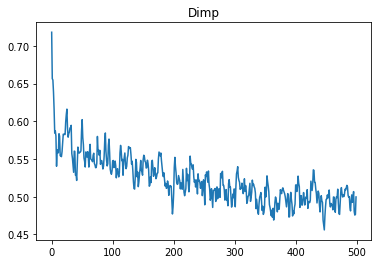

In [45]:
plt.plot(dimp_acc.mean(axis=0))
plt.title('Dimp')
plt.show()

# Plot of OCC subset

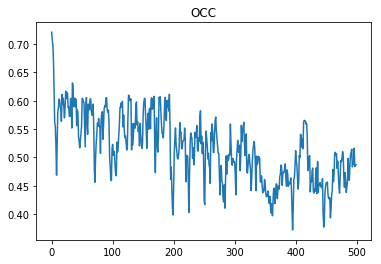

In [46]:
plt.title('OCC')
plt.plot(metrics_result['OCC'].mean(axis=0))
plt.show()

In [18]:
# Plot of deformation subset

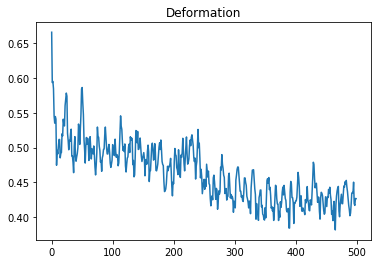

In [47]:
plt.title('Deformation')
plt.plot(metrics_result['Deformation'].mean(axis=0))
plt.show()

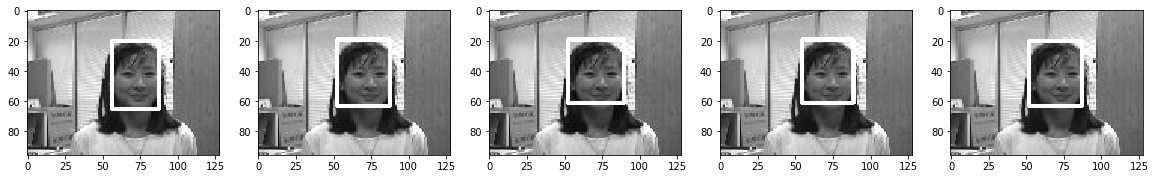

In [49]:
n_images = 500
siam_girl = np.loadtxt(os.path.join(dimp_dir, 'Girl.txt'), delimiter='\t')


girl_path = os.path.join(OTB100, 'Girl', 'img')
img = cv2.imread(os.path.join(girl_path, '0001.jpg'),0)


plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(2,5,i+1)
    siam_img = img.copy()
    r0 = convert_center_to_bbb(siam_girl[2*i*n_images,:]).astype(int)
    cv2.rectangle(siam_img, (r0[0],r0[1]),(r0[2],r0[3]),(255,0,0), 2)
    plt.imshow(siam_img, cmap='gray')

plt.show()

In [55]:

def show_acc_plot(name):

    try:
        gt_bbox = np.loadtxt(os.path.join(OTB100, name, 'groundtruth_rect.txt'), delimiter=',')
    except:
        gt_bbox = np.loadtxt(os.path.join(OTB100, name, 'groundtruth_rect.txt'), delimiter='\t')

    dimp_v = np.loadtxt(os.path.join(dimp_dir, name + '.txt'), delimiter='\t')
    min_dim = dimp_v.shape[0]


    gt_bbox = append_reverse_np(gt_bbox, 40)
    gt_bbox = gt_bbox[:min_dim,:]

    da = []
    for d, gt in zip(dimp_v, gt_bbox):
        # gt = convert_center_to_bbb(gt)
        d = convert_center_to_bbb(d)
        da.append(bb_intersection_over_union(d, convert_center_to_bbb(gt)))

    da = smooth(np.asarray(da))

    plt.title(f'Plot accuracy {name}')
    plt.plot(da)
    plt.show()

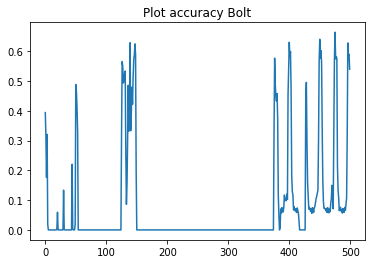

In [59]:
show_acc_plot('Bolt')